In [510]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

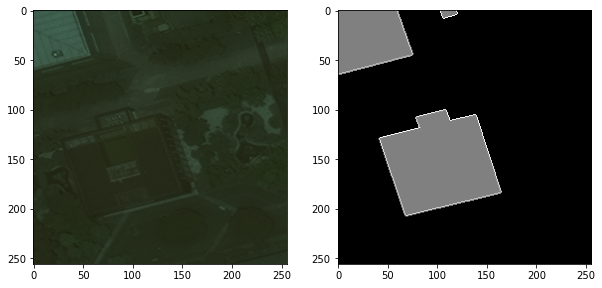

In [511]:
img = mpimg.imread('pred_img.png')
target = np.loadtxt('target.npy')
fig, ax = plt.subplots(ncols=2, figsize=(10,10))
ax[0].imshow(img)
ax[1].imshow(target, cmap = 'gray')

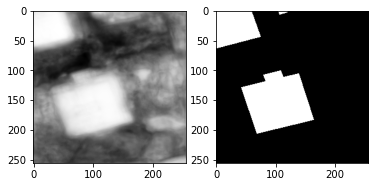

In [512]:
bldg = np.loadtxt('bldg.npy')
bldg_targ = (target == 1)
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(bldg, cmap='gray')
ax[1].imshow(bldg_targ, cmap='gray')

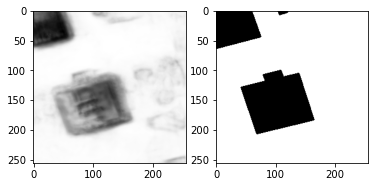

In [513]:
back = np.loadtxt('back.npy')
back_targ = (target == 0)
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(back, cmap='gray')
ax[1].imshow(back_targ, cmap='gray')

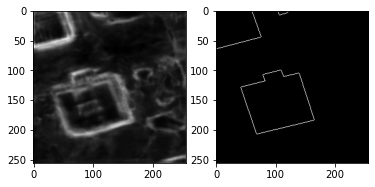

In [514]:
out = np.loadtxt('out.npy')
out_targ = (target == 2)
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(out, cmap='gray')
ax[1].imshow(out_targ, cmap='gray')

In [515]:
pred = np.ones(shape=bldg.shape)

In [516]:
def sigmoid(x):
      return 1 / (1 + np.exp(-x))

In [517]:
#bldg_act = sigmoid(bldg) * 255
bldg_act = np.tanh(bldg) * 255
bldg_act = bldg_act.astype(np.uint16)
_,bldg_th = cv2.threshold(bldg_act,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [518]:
#back_act = sigmoid(back) * 255
back_act = np.tanh(back) * 255
back_act = back_act.astype(np.uint16)
_,back_th = cv2.threshold(back_act,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [519]:
#out_act = sigmoid(out) * 255
out_act = np.tanh(out) * 255
out_act = out_act.astype(np.uint16)
_,out_th = cv2.threshold(out_act,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [520]:
out_th = out_th.astype(np.bool)
back_th = back_th.astype(np.bool)
bldg_th = bldg_th.astype(np.bool)

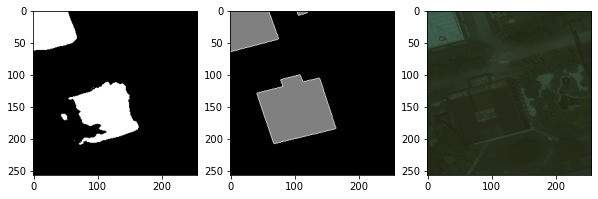

In [521]:
pred[bldg_th] = 1
pred[back_th] = 0
#pred[out_th] = 1
target = np.loadtxt('target.npy')
img = mpimg.imread('pred_img.png')
fig, ax = plt.subplots(ncols=3, figsize=(10,10))
ax[0].imshow(pred, cmap="gray")
ax[1].imshow(target, cmap='gray')
ax[2].imshow(img)